In [252]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

base_path = "data"
dataset_csv_path = os.path.join(base_path,"data.csv")
dataset_description_csv_path = os.path.join(base_path,"data_description.xlsx")


In [253]:
import pandas as pd

dataset = pd.read_csv(dataset_csv_path, index_col=0, parse_dates=True, dtype='float64')
dataset_description = pd.read_excel(dataset_description_csv_path, dtype='string')
dataset_description.fillna('')
dataset_description.drop_duplicates(subset=['Name'], inplace=True)
dataset_description.set_index('Name', inplace=True)

dataset = dataset.set_index(pd.to_datetime(dataset.index))
dataset.columns = pd.MultiIndex.from_frame(dataset_description.loc[dataset.columns, ['Location', 'Custom Name']])
dataset.head()



Location               Tank 1                                              \
Custom Name           O2 perc pH regulator in flow Sludge recycle in flow   
2022-01-01 00:00:00  18.49650             18.81396               100.0696   
2022-01-01 00:05:00  18.49731             18.70401               100.0715   
2022-01-01 00:10:00  18.49693             18.59405               100.0733   
2022-01-01 00:15:00  18.49603             18.48410               100.0751   
2022-01-01 00:20:00  18.49512             18.37415               100.0770   

Location                                                                    \
Custom Name         Air in flow Content height pH measurement FR        pH   
2022-01-01 00:00:00    618.6791            NaN          1931.360  7.272931   
2022-01-01 00:05:00    613.7349            NaN          1929.365  7.273591   
2022-01-01 00:10:00    608.7906            NaN          1924.322  7.274251   
2022-01-01 00:15:00    603.8464            NaN          1919.279  7.274910   
2022-01-01 00:20:00    598.9022            NaN          1914.235  7.275570   

Location                                                        ...  \
Custom Name         O2 measurement FR O2 dissolved Temperature  ...   
2022-01-01 00:00:00          1878.295     1.549485    27.25480  ...   
2022-01-01 00:05:00          1878.252     1.552745    27.25177  ...   
2022-01-01 00:10:00          1878.209     1.556006    27.24874  ...   
2022-01-01 00:15:00          1878.167     1.559266    27.24572  ...   
2022-01-01 00:20:00          1878.124     1.562526    27.24269  ...   

Location                 Input A                         Input B            \
Custom Name         Conductivity       TOC        pH Temperature  Flowrate   
2022-01-01 00:00:00     60.10090  7.385031  7.081979    27.39823  20.89696   
2022-01-01 00:05:00     60.09105  7.375766  7.136544    27.07825  26.92165   
2022-01-01 00:10:00     60.08120  7.366502  7.085941    26.75828  14.01370   
2022-01-01 00:15:00     60.07135  7.357237  6.743883    26.50328   5.78938   
2022-01-01 00:20:00     60.06150  7.347972  6.621848    26.29828  39.27962   

Location                                                          Exit  
Custom Name         Amount of sludge Conductivity TOC        pH Target  
2022-01-01 00:00:00         260.1674     2.193955 NaN  6.236635    NaN  
2022-01-01 00:05:00         259.9575     2.187813 NaN  6.238485    NaN  
2022-01-01 00:10:00         259.7475     2.181671 NaN  6.240336    NaN  
2022-01-01 00:15:00         259.5375     2.175529 NaN  6.242187    NaN  
2022-01-01 00:20:00         259.3275     2.169388 NaN  6.244037    NaN  

[5 rows x 36 columns]

In [254]:
import pandas as pd
from scipy import stats

def get_general_stats(dataset, isStyled=True):
    all_stats = pd.DataFrame(index=dataset.columns)
    for col in dataset.columns:
        all_stats.loc[col, 'min'] = dataset[col].min()
        all_stats.loc[col, 'max'] = dataset[col].max()
        all_stats.loc[col, 'mean'] = dataset[col].mean()
        all_stats.loc[col, '25%'] = dataset[col].quantile(0.25)
        all_stats.loc[col, '50%'] = dataset[col].quantile(0.5)
        all_stats.loc[col, '75%'] = dataset[col].quantile(0.75)
        all_stats.loc[col, 'iqr'] = stats.iqr(dataset[col], nan_policy='omit')
        all_stats.loc[col, 'std'] = dataset[col].std()
        all_stats.loc[col, 'median'] = dataset[col].median()
        all_stats.loc[col, 'count'] = dataset[col].count()
        all_stats.loc[col, 'missing'] = dataset[col].isna().sum()
        all_stats.loc[col, 'missing %'] = dataset[col].isna().sum() / dataset.index.value_counts().sum() * 100
        all_stats.loc[col, 'skew'] = stats.skew(dataset[col], nan_policy='omit')
        all_stats.loc[col, 'max z-score'] = stats.zscore(dataset[col], nan_policy='omit').max()
        all_stats.loc[col, 'min z-score'] = stats.zscore(dataset[col], nan_policy='omit').min()

    # Styling
    styled_all_stats = all_stats.style.background_gradient(cmap='Blues', axis=None, subset=['missing %'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greens', axis=None, subset=['mean'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Reds', axis=None, subset=['std'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Purples', axis=None, subset=['min'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greys', axis=None, subset=['max'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Oranges', axis=None, subset=['25%'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Oranges', axis=None, subset=['50%'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Oranges', axis=None, subset=['75%'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greens', axis=None, subset=['iqr'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greens', axis=None, subset=['skew'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greens', axis=None, subset=['max z-score'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Greens', axis=None, subset=['min z-score'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Oranges', axis=None, subset=['median'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Blues', axis=None, subset=['count'])
    styled_all_stats = styled_all_stats.background_gradient(cmap='Blues', axis=None, subset=['missing'])
    
    # Set format
    styled_all_stats = styled_all_stats.format({'missing %': '{:,.2f}', 
                                                'mean': '{:.2f}',
                                                'std': '{:.2f}', 
                                                'min': '{:.2f}',
                                                'max': '{:.2f}',
                                                '25%': '{:.2f}',
                                                '50%': '{:.2f}',
                                                '75%': '{:.2f}',
                                                'iqr': '{:.2f}',
                                                'skew': '{:.2f}',
                                                'max z-score': '{:.2f}',
                                                'min z-score': '{:.2f}',
                                                'median': '{:.2f}',
                                                'count': '{:,.0f}',
                                                'missing': '{:,.0f}'
                                                  })
    
    if isStyled:
        return styled_all_stats
    return all_stats


In [255]:
get_general_stats(dataset, isStyled=True)

# get the index column
# dataset.index.value_counts()

## General Stats Conclusion

- There are alot of missing values in the `Exit N03 Dissolved` column, i decided to remove this column.

In [256]:
# drop the N03 Disolved columnm
# dataset.drop(("N03 Dissolved"), inplace=True, axis=0)

In [257]:
import matplotlib.pyplot as plt
import numpy as np

def plot_box_plots(dataset, dataset_description, figsize=(20, 10), title='Box Plots', save_path=None):
    fig_cols = 2
    fig_rows = (int(np.ceil(len(dataset) )/ fig_cols), fig_cols)
    print("making subplots: ", fig_rows, fig_cols)
    fig, ax = plt.subplots(*fig_rows, figsize=(17, 35), gridspec_kw={'hspace': .4})
    print("made subplots")
    fig.suptitle(title)
    

    # Preprocess data outside the loop
    data_index_values = dataset.index.get_level_values(1)
    data_units = dataset_description.loc[data_index_values, 'Units'].values

    # Make one boxplot per unit of measure
    for (name, data), ax in zip(dataset.groupby(level=0), axes.flatten()):
        data.boxplot(ax=ax)
        ax.set_title(name)
        ax.set_xticklabels([str(tup[0]) for tup in data.index])
        ax.set_ylabel(data_units[data.index[0]])

    # Remove unused subplots
    for unused_ax in axes.flatten()[len(dataset):]:
        unused_ax.axis('off')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Example usage:
# plot_box_plots(your_dataset, your_dataset_description, title='Your Title', save_path='your_plot.png')


In [258]:
def plot_data_from_column_using_date_range(column_name, start_date, end_date):
    dataset[column_name].loc[(dataset['TimeStamp'] > start_date) & (dataset['TimeStamp'] < end_date)].plot(figsize=(20,10))

In [259]:
from math import ceil

def plot_box_plots(dataset, figsize=(17, 35), fig_cols=2, title=None, save_path=None):
    
    grouped_data = dataset.groupby(level=1, axis=1)    
    grid = (ceil((len(grouped_data)) / fig_cols), fig_cols)
    fig, ax = plt.subplots(*(grid), figsize=figsize, gridspec_kw={'hspace': .4})
    used_axes = ax[np.unravel_index(range(len(grouped_data)), grid)]
    boxplots = grouped_data.boxplot(ax=used_axes, sharey=False)
    
    for name, a in boxplots.items():
        ticks = [tup[0] for tup in grouped_data.groups[name]]
        labels = [str(tup[0]) for tup in grouped_data.groups[name]]
        
        a.set_xticks(range(1, len(ticks) + 1))
        a.set_xticklabels(labels)
        a.set_ylabel("")
        
    for unused_ax in ax.flatten()[len(grouped_data):]:
        unused_ax.axis('off')
        
    if title:
        fig.suptitle(title)

    if save_path:
        plt.savefig(save_path)
        
    plt.show()


C:\Users\johna\AppData\Local\Temp\ipykernel_22392\898358260.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped_data = dataset.groupby(level=1, axis=1)


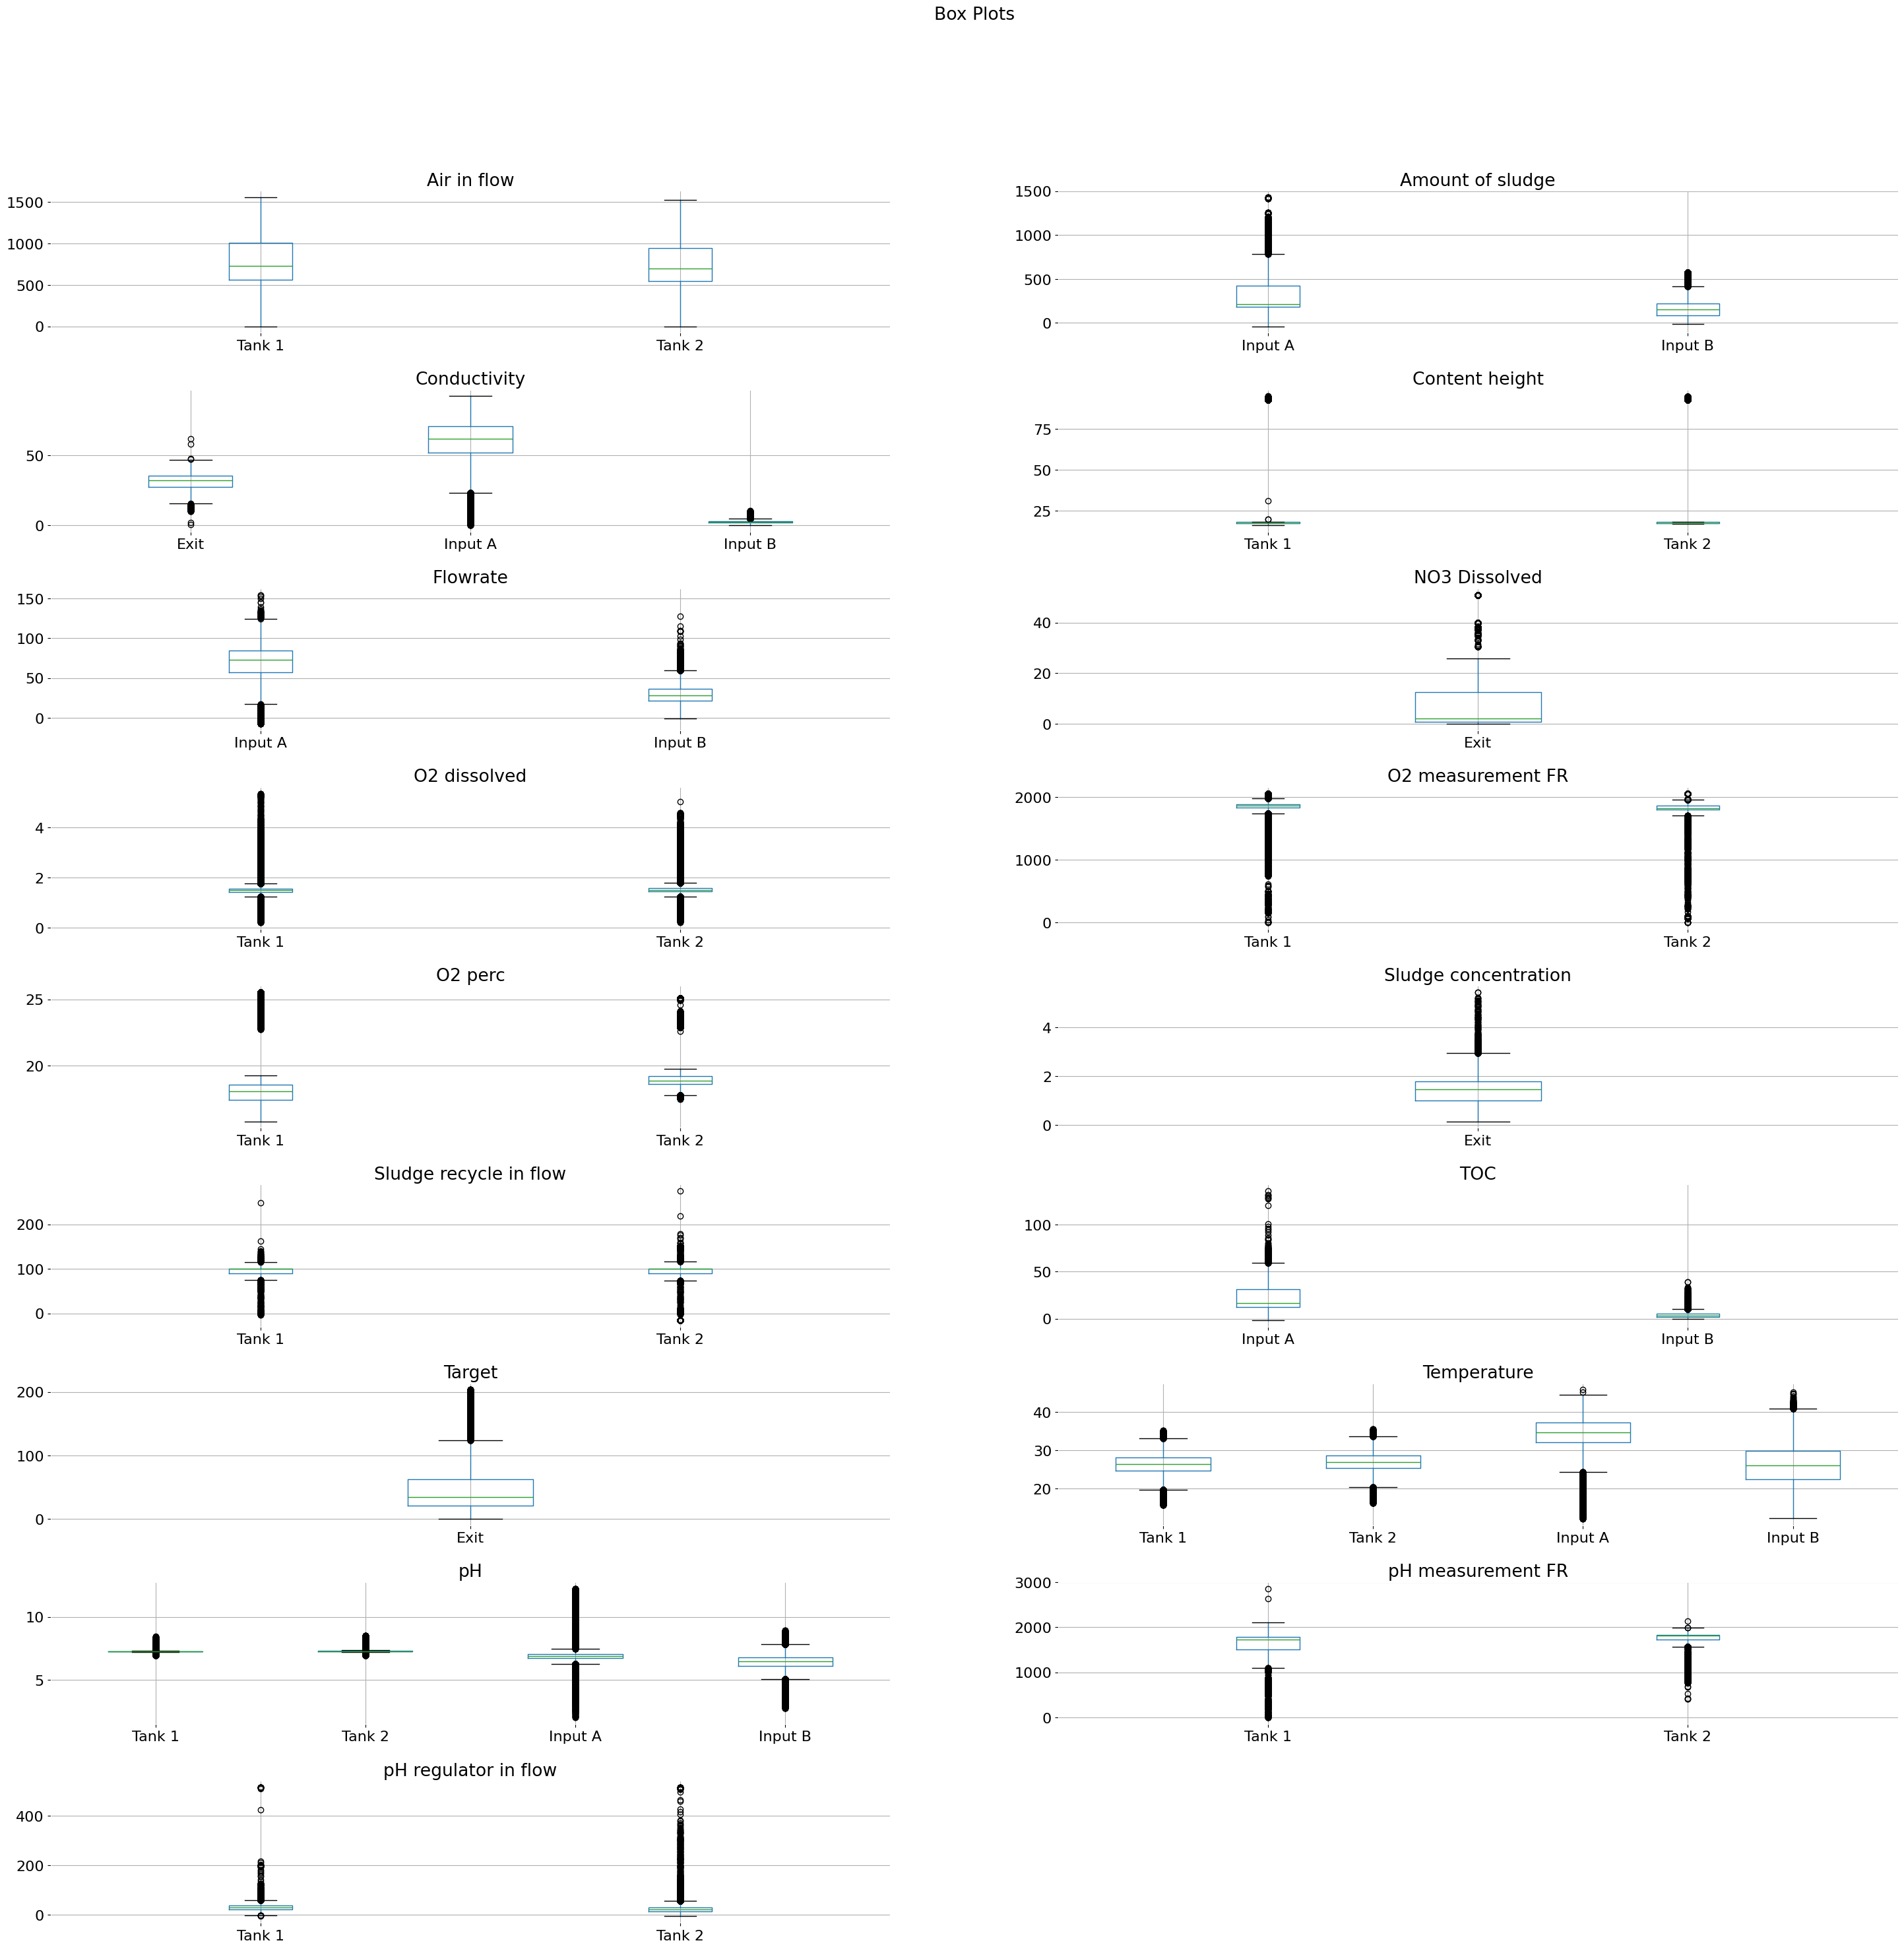

In [260]:
plot_box_plots(dataset, title='Box Plots', figsize=(35, 35), save_path='boxplots.png')

## Boxplots Explained 

- The boxplots show `Tank1 Contentent Height` and `Tank2 Content Height` have some outrageous outliers
- We also see some more outliers for 

In [261]:
# Data Cleaning and Imputation
# Null Values 
# Method 1: Drop all the rows with null values
dataset.dropna(inplace=True)

# Method 2 : Replace null values with the mean of the column
# # replace all the null values in InputC1 with the mean of the column from the same day
# dataset['InputC1'] = dataset.groupby(dataset['TimeStamp'].dt.date)['InputC1'].transform(lambda x: x.fillna(x.mean()))


In [262]:
get_general_stats(dataset, isStyled=False)

min          max         mean  \
Location Custom Name                                                     
Tank 1   O2 perc                   15.806650    18.391910    17.593972   
         pH regulator in flow      -0.440424   202.836800    33.089738   
         Sludge recycle in flow    -2.850274   248.376300    88.479051   
         Air in flow               26.812020  1527.085000   716.138192   
         Content height            17.181650    18.415400    17.722226   
         pH measurement FR          3.750000  2116.163000  1607.951553   
         pH                         7.052068     8.385586     7.436448   
         O2 measurement FR          3.269135  2059.961000  1819.550922   
         O2 dissolved               0.212584     3.381146     1.500427   
         Temperature               18.718270    32.782390    24.944230   
Exit     Sludge concentration       0.164770     4.970360     0.932330   
         Conductivity              16.773680    61.798830    29.565757   
         NO3 Dissolved              0.000019    51.000000     9.407557   
Tank 2   O2 perc                   17.688820    19.398490    18.857530   
         pH regulator in flow      -6.023621   143.446100    17.102283   
         Sludge recycle in flow    -0.364225   274.419100   104.658178   
         Air in flow               93.109670  1527.640000   693.446097   
         Content height            17.217440    18.446510    17.721970   
         pH measurement FR       1422.768000  1998.095000  1829.902854   
         pH                         7.006361     8.492261     7.451257   
         O2 measurement FR         -1.913026  2059.961000  1843.731272   
         O2 dissolved               0.272549     2.986977     1.515721   
         Temperature               19.532730    33.577330    25.633483   
Input A  Temperature               23.456700    43.576180    33.892679   
         Flowrate                  -5.914517   154.497100    67.245958   
         Amount of sludge           0.664062  1038.320000   236.109854   
         Conductivity               0.118166    92.420960    70.839968   
         TOC                       -0.071140    78.275940    15.895899   
         pH                         2.397020    12.137340     6.784977   
Input B  Temperature               16.745860    43.624690    29.331343   
         Flowrate                  -0.770695   127.795700    30.143704   
         Amount of sludge           0.525000   571.200000   112.932035   
         Conductivity               0.007180    10.165010     3.042991   
         TOC                       -0.146004    24.589740     3.348306   
         pH                         4.538803     8.939406     6.709526   
Exit     Target                    -0.003886   153.000700    21.426566   

                                         25%          50%          75%  \
Location Custom Name                                                     
Tank 1   O2 perc                   17.326025    17.618970    17.943575   
         pH regulator in flow      23.819205    33.141430    40.889745   
         Sludge recycle in flow    89.738925    89.962800    90.101685   
         Air in flow              514.335150   624.610600   832.247500   
         Content height            17.383695    17.470800    18.294035   
         pH measurement FR       1470.142000  1718.374000  1798.161500   
         pH                         7.351479     7.485854     7.503230   
         O2 measurement FR       1807.632000  1863.819000  1904.365500   
         O2 dissolved               1.450305     1.511549     1.563032   
         Temperature               23.063530    25.136570    27.066295   
Exit     Sludge concentration       0.779083     0.944268     1.047170   
         Conductivity              25.926105    30.366140    32.992300   
         NO3 Dissolved              1.013800     2.103991    10.714395   
Tank 2   O2 perc                   18.738675    18.855370    18.974605   
         pH regulator in flow       2.417801

In [263]:
def plot_histogram_from_column(column_name, bins):
    plt.figure(figsize=(20,10))
    dataset[column_name].hist(figsize=(20,10), bins=bins)
    plt.show()
    
def drop_from_column_using_upper_quantile(dataset,column_name, upper_quantile):
    dataset = dataset[dataset[column_name] < dataset[column_name].quantile(upper_quantile)]
    return dataset

def drop_from_column_using_lower_quantile(dataset,column_name, lower_quantile):
    dataset = dataset[dataset[column_name] > dataset[column_name].quantile(lower_quantile)]
    return dataset  

In [264]:
# Outliers
# Method 1: Drop all the rows with outliers
# # Column InputC2
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC2', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC2', 0.25)
# # Column InputC3
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC3', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC3', 0.25)




# remove 

# Outlier Strategy
- For each column, we want to define our strategy for detecting outliers and then further specify our strategy for dealing with them in the next step.

### Outlier Detection Strategy per column
- **Input C1:** All the values are pretty close to the mean. I don't believe there are any outliers. (Assuming Method 1 for null values was used)

- **Input C2:** Since the data doesn't appear to be left or right skewed, we can just use the upper and lower quartile. rather than z-score for outlier detection.

- **Input C3:** 


In [265]:
def calculate_zscore_from_column(dataset,column_name):
    dataset[column_name+'_zscore'] = (dataset[column_name] - dataset[column_name].mean())/dataset[column_name].std(ddof=0)
    return dataset
# def calculate